In [3]:
import os
import opyplus as op
import warnings
warnings.filterwarnings("ignore")

eplus_dir_path = op.get_eplus_base_dir_path((9, 2, 0))

# idf path
idf_path = os.path.join(
    eplus_dir_path,
    "ExampleFiles",
    "DOEE-EnergyPlus V0.1.2(EAST).idf"
)

# epw path
epw_path = os.path.join(
    eplus_dir_path,
    "WeatherData",
    "IRN_Tehran-Mehrabad.407540_ITMY.epw"
)

base_dir_path = os.path.join(
    eplus_dir_path,
    "Result","Tehran(EAST)"
) 
# run simulation
s = op.simulate(
    idf_path,
    epw_path,
    base_dir_path,
    simulation_name=None,
    print_function=None,
    beat_freq=None,
)


print(f"status: {s.get_status()}\n")
print(f"Eplus .err file:\n{s.get_out_err().get_content()}")


called Simulation.from_input on a simulation directory that is not empty (C:\\EnergyPlusV9-2-0\Result\Tehran(EAST))


status: finished

Eplus .err file:
Program Version,EnergyPlus, Version 9.2.0-921312fa1d, YMD=2022.02.05 06:22,
   ** Warning ** ProcessScheduleInput: Schedule:Day:Interval="SCHEDULE DAY 1", , One or more values are not integer as required by Schedule Type Limits Name=ONOFF
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS OFF DISCRETE", Blank Schedule Type Limits Name input -- will not be validated.
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS ON CONTINUOUS", Blank Schedule Type Limits Name input -- will not be validated.
   ************* Beginning Zone Sizing Calculations
   ** Warning ** GetHTSurfaceData: Surfaces with interface to Ground found but no "Ground Temperatures" were input.
   **   ~~~   ** Found first in surface=SURFACE 400
   **   ~~~   ** Defaults, constant throughout the year of (18.0) will be used.
   ** Warning ** GetSurfaceData: Construction INTERIOR CEILING of interzone surface SURFACE 405 does not have the same materials in the r

In [4]:
# retrieve hourly output (.eso file)
hourly_output = s.get_out_eso()

# ask for datetime index on year 2013
hourly_output.create_datetime_index(2018)

# get Pandas dataframe
df = hourly_output.get_data()

# monthly resample and display
#print(df[[
#    "environment,Site Outdoor Air Drybulb Temperature",
#    "main zone,Zone Mean Air Temperature"
#]].resample("MS").mean())

import pandas as pd
df=pd.DataFrame(data=df)

import pandas as pd
df2=df[['month','electricity:facility,Meter','gas:facility,Meter']]

df3=df2.groupby('month').sum()
df3

,"electricity:facility,Meter","gas:facility,Meter"
month,,
1,1.428786e+11,6.927363e+11
2,1.280735e+11,5.444377e+11
3,1.351881e+11,2.445073e+11
4,1.161230e+11,0.000000e+00
5,1.822454e+11,0.000000e+00
6,2.136964e+11,0.000000e+00
7,2.199358e+11,0.000000e+00
8,2.307152e+11,0.000000e+00
9,1.989501e+11,0.000000e+00


<AxesSubplot:xlabel='month'>

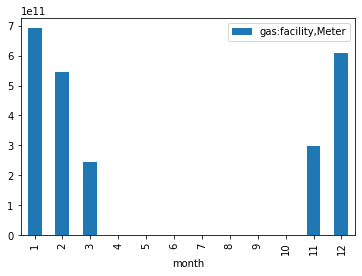

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df3.plot.bar(x=None,y='gas:facility,Meter')